In [1]:
dataAll <- read.csv("maindata.csv", header=TRUE)

In [2]:
head(dataAll)

Site,PeriodCode,SimpPeriodCode,SiteNum,Lagomorpha,Artiodactyla,Rodentia
Los Pozos - Sweetwater Locus,1,A,AZ AA:12:91 (ASM),0.7846154,0.18461538,0.03076923
Arroyo Site,1,A,AZ AA:3:28 (ASM),0.8955224,0.08955224,0.01492537
Gate Site,1,A,AZ AA:3:8 (ASM),0.9111111,0.02222222,0.06666667
Lookout Site,1,A,AZ S:7:30 (ASM),0.9218750,0.01562500,0.06250000
Willow Ridge Site,2,A,AZ AA:12:968 (ASM),0.2702703,0.71171171,0.01801802
Valley Farms,2,A,?,0.6525424,0.14406780,0.20338983


### Full Data Centroid:

In [3]:
centroidTotal = c(mean(dataAll$Lagomorpha), mean(dataAll$Artiodactyla), mean(dataAll$Rodentia))
centroidTotal

[1] 0.7663067 0.1280685 0.1056248

In [4]:
periodA = subset(dataAll, SimpPeriodCode == "A")

In [5]:
periodB = subset(dataAll, SimpPeriodCode == "B")

In [6]:
periodC = subset(dataAll, SimpPeriodCode == "C")

In [7]:
periodD = subset(dataAll, SimpPeriodCode == "D")

### Middle and Late Archaic Centroid:

In [8]:
centroidA = c(mean(periodA$Lagomorpha), mean(periodA$Artiodactyla), mean(periodA$Rodentia))
centroidA

[1] 0.81422837 0.13074305 0.05502857

### Pioneer, Early Ceramic, and Colonial Centroid:

In [9]:
centroidB = c(mean(periodB$Lagomorpha), mean(periodB$Artiodactyla), mean(periodB$Rodentia))
centroidB

[1] 0.84061002 0.06940074 0.08998923

### Sedentary Centroid:

In [10]:
centroidC = c(mean(periodC$Lagomorpha), mean(periodC$Artiodactyla), mean(periodC$Rodentia))
centroidC

[1] 0.7038882 0.1648301 0.1312817

### Classic Centroid:

In [11]:
centroidD = c(mean(periodD$Lagomorpha), mean(periodD$Artiodactyla), mean(periodD$Rodentia))
centroidD

[1] 0.7452644 0.1354500 0.1192855

In [12]:
library("ggtern")
options(warn = -1)  #The stuff below produces an insane amount of warning messages - be careful that real problems aren't being hidden by this!

Loading required package: ggplot2
--
Consider donating at: http://ggtern.com
Even small amounts (say $10-50) are very much appreciated!
Remember to cite, run citation(package = 'ggtern') for further info.
--

Attaching package: 'ggtern'

The following objects are masked from 'package:ggplot2':

    aes, annotate, calc_element, ggplot, ggplot_build, ggplot_gtable,
    ggplotGrob, ggsave, layer_data, layer_grob, layer_scales, theme,
    theme_bw, theme_classic, theme_dark, theme_get, theme_gray,
    theme_light, theme_linedraw, theme_minimal, theme_set, theme_void



### Full Dataset Ternary Plot

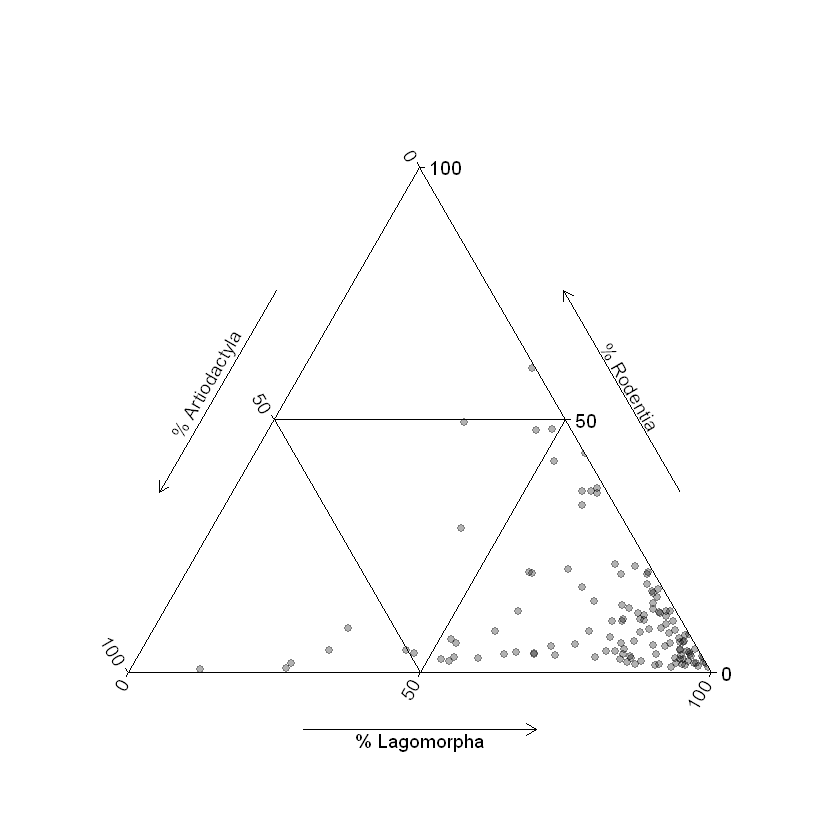

In [13]:
fullPlot <- ggtern(data=dataAll,aes(Artiodactyla, Rodentia, Lagomorpha)) + 
  geom_point(alpha = .3, size=2) +
  scale_shape_identity() +
  theme_linedraw(base_size = 14, base_family = "") +
  scale_T_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
  scale_R_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
  scale_L_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
  Tarrowlab("% Rodentia") + Rarrowlab("% Lagomorpha") + Larrowlab("% Artiodactyla") + theme_showarrows()
fullPlot

Saving 6.67 x 6.67 in image


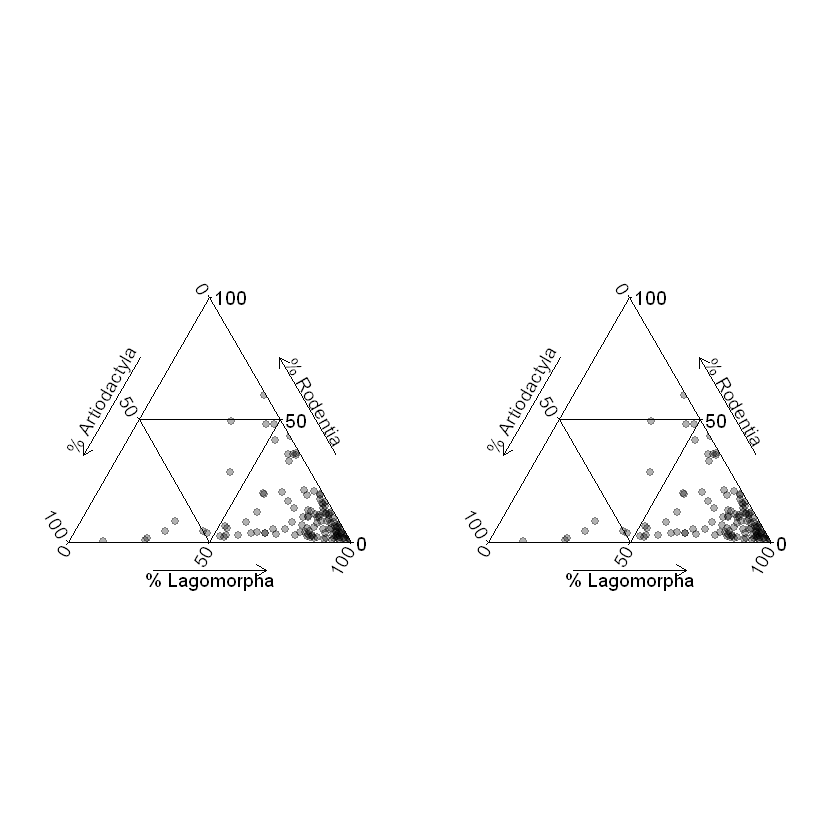

In [14]:
sidebyside = grid.arrange(fullPlot, fullPlot, nrow=1)
ggsave("fulldata.svg", plot=sidebyside, device="svg")

In [15]:
ps = c("A", "B", "C", "D", "T")
Lagomorpha = c(centroidA[1], centroidB[1], centroidC[1], centroidD[1], centroidTotal[1])
Artiodactyla = c(centroidA[2], centroidB[2], centroidC[2], centroidD[2], centroidTotal[2])
Rodentia = c(centroidA[3], centroidB[3], centroidC[3], centroidD[3], centroidTotal[3])
dfCentroids = data.frame(ps, Artiodactyla, Rodentia, Lagomorpha)
dfCentroids

ps,Artiodactyla,Rodentia,Lagomorpha
A,0.13074305,0.05502857,0.8142284
B,0.06940074,0.08998923,0.8406100
C,0.16483009,0.13128166,0.7038882
D,0.13545005,0.11928552,0.7452644
T,0.12806851,0.10562482,0.7663067


### Centroids for time periods (and overall) Plot

In [22]:
centroid_main = ggtern(data=dfCentroids,aes(Artiodactyla, Rodentia, Lagomorpha, label=ps)) + 
  geom_text() +
  theme_linedraw(base_size = 14, base_family = "") +
  scale_T_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
  scale_R_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
  scale_L_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
  Tarrowlab("% Rodentia") + Rarrowlab("% Lagomorpha") + Larrowlab("% Artiodactyla") + theme_showarrows()

In [23]:
centroid_zoom = ggtern(data=dfCentroids,aes(Artiodactyla, Rodentia, Lagomorpha, label=ps)) + 
  geom_point(alpha = .3, size=3) +
  theme_linedraw(base_size = 14, base_family = "") +
  scale_T_continuous(name = "", limits = c(0,.5), breaks = c(0, .5), minor_breaks = NULL, labels = c("0", "50")) +
  scale_R_continuous(name = "", limits = c(.5,1), breaks = c(.5, 1), minor_breaks = NULL, labels = c("50", "100")) +
  scale_L_continuous(name = "", limits = c(0,.5), breaks = c(0, .5), minor_breaks = NULL, labels = c("0", "50")) +
  Tarrowlab("% Rodentia") + Rarrowlab("% Lagomorpha") + Larrowlab("% Artiodactyla") + theme_showarrows()

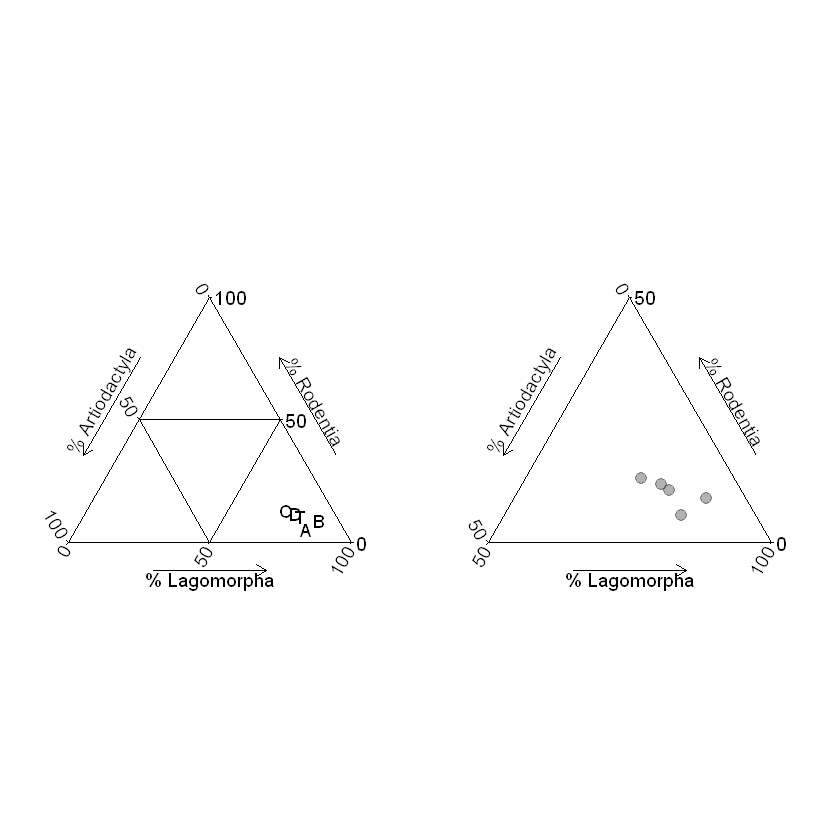

In [24]:
sidebyside = grid.arrange(centroid_main, centroid_zoom, nrow=1)

In [25]:
ggsave("centroids2.svg", plot=sidebyside, device="svg")

Saving 6.67 x 6.67 in image


### Time Period Plots

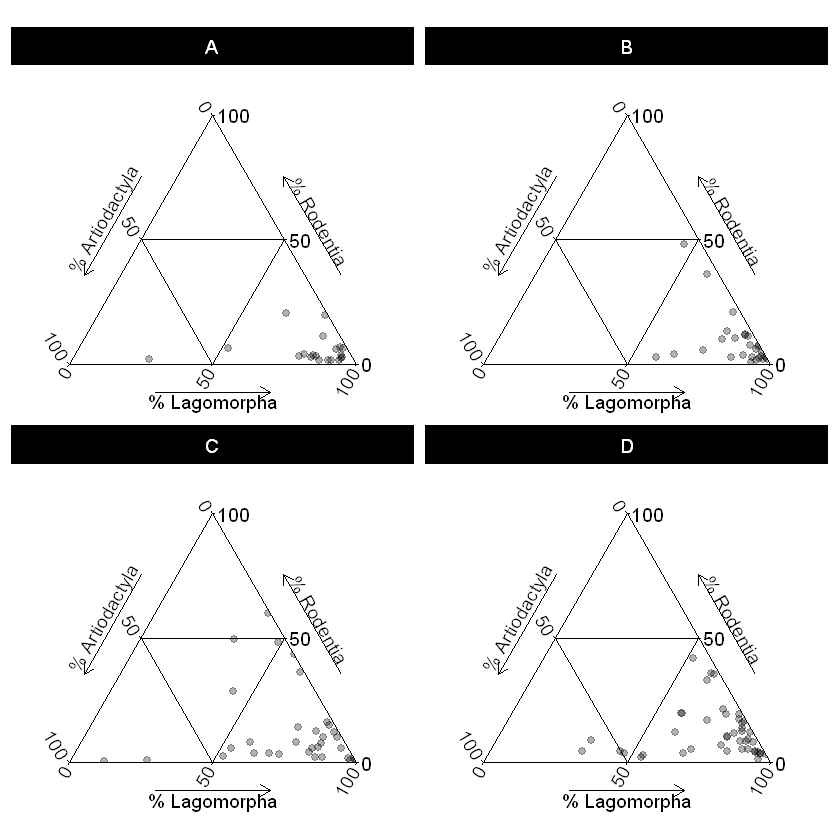

In [20]:
ggtern(data=dataAll,aes(Artiodactyla, Rodentia, Lagomorpha)) + 
  geom_point(alpha = .3, size=2) +
  facet_wrap("SimpPeriodCode") +
  theme_linedraw(base_size = 14, base_family = "") +
  scale_T_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
  scale_R_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
  scale_L_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
  Tarrowlab("% Rodentia") + Rarrowlab("% Lagomorpha") + Larrowlab("% Artiodactyla") + theme_showarrows()


In [21]:
ggsave("time_periods.svg", device="svg")

Saving 6.67 x 6.67 in image


## Add distance from centroid column

In [122]:
dataAll$distance <- sqrt((dataAll$Lagomorpha - centroidTotal[1])^2 + (dataAll$Artiodactyla - centroidTotal[2])^2 + (dataAll$Rodentia - centroidTotal[3])^2)

In [123]:
head(dataAll)

Site,PeriodCode,SimpPeriodCode,SiteNum,Lagomorpha,Artiodactyla,Rodentia,distance
Los Pozos - Sweetwater Locus,1,A,AZ AA:12:91 (ASM),0.7846154,0.18461538,0.03076923,0.09558304
Arroyo Site,1,A,AZ AA:3:28 (ASM),0.8955224,0.08955224,0.01492537,0.16250105
Gate Site,1,A,AZ AA:3:8 (ASM),0.9111111,0.02222222,0.06666667,0.18354699
Lookout Site,1,A,AZ S:7:30 (ASM),0.9218750,0.01562500,0.06250000,0.19673534
Willow Ridge Site,2,A,AZ AA:12:968 (ASM),0.2702703,0.71171171,0.01801802,0.77095166
Valley Farms,2,A,?,0.6525424,0.14406780,0.20338983,0.15085189


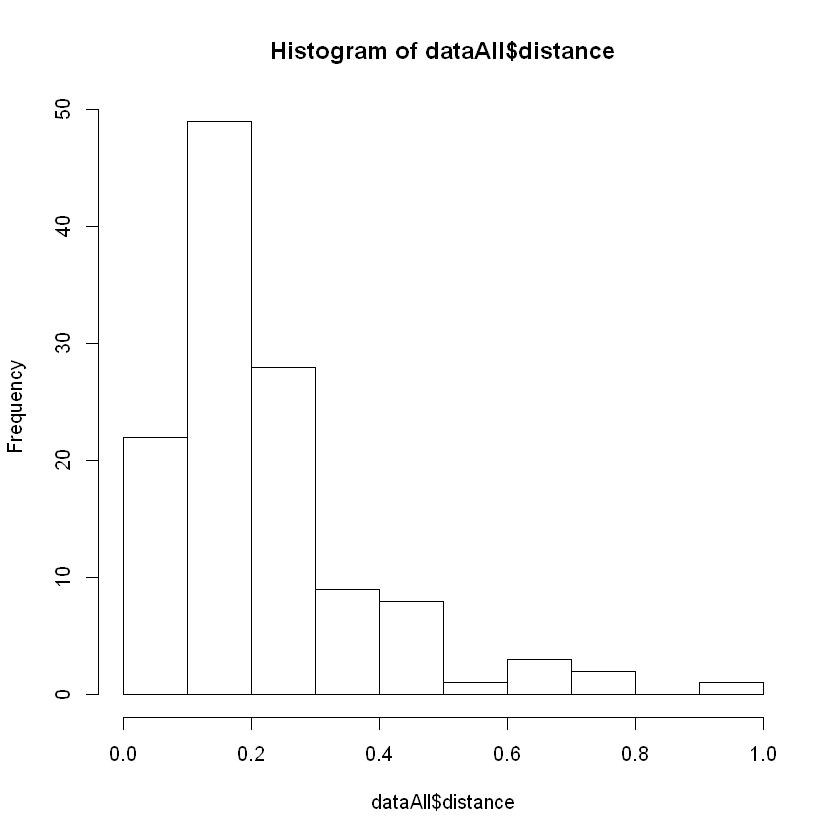

In [124]:
hist(dataAll$distance)

## Add distance to period-specific centroid column

In [125]:
dataAll[, "PeriodDistance"] <- NA
class(dataAll$PeriodDistance)

[1] "logical"

In [126]:
distance3D <- function(a, b) 
{
    sqrt((a[1] - b[1])^2 + (a[2] - b[2])^2 + (a[3] - b[3])^2)
}

In [127]:
# This is a bit hacky. Seems like there ought to be a straightforward way to simply 
# add this as a calculated column, but I can't get it to work
troika <- c("Lagomorpha", "Artiodactyla", "Rodentia")
for (i in 1:nrow(dataAll))
{
    if (is.na(dataAll$SimpPeriodCode[i] )) 
    {
        dataAll$PeriodDistance[i] <- NA
    } else
    {
        periodIndex <- which(c("A", "B", "C", "D") == dataAll$SimpPeriodCode[i])[[1]]
        dataAll$PeriodDistance[i] <- distance3D(dfCentroids[periodIndex, troika], dataAll[i, troika])
    }    
}

In [128]:
dataAll

Site,PeriodCode,SimpPeriodCode,SiteNum,Lagomorpha,Artiodactyla,Rodentia,distance,PeriodDistance
Los Pozos - Sweetwater Locus,1.0,A,AZ AA:12:91 (ASM),0.7846154,0.184615385,0.03076923,0.09558304,0.06608837
Arroyo Site,1.0,A,AZ AA:3:28 (ASM),0.8955224,0.089552239,0.01492537,0.16250105,0.0995674
Gate Site,1.0,A,AZ AA:3:8 (ASM),0.9111111,0.022222222,0.06666667,0.18354699,0.14594
Lookout Site,1.0,A,AZ S:7:30 (ASM),0.9218750,0.015625000,0.06250000,0.19673534,0.157784
Willow Ridge Site,2.0,A,AZ AA:12:968 (ASM),0.2702703,0.711711712,0.01801802,0.77095166,0.7967338
Valley Farms,2.0,A,?,0.6525424,0.144067797,0.20338983,0.15085189,0.2198431
Dairy (Tierra Excavations),2.0,A,AZ AA:12:285 (ASM),0.7920792,0.009900990,0.19801980,0.15219927,0.1885202
Cortaro Fan,2.0,A,AZ AA:12:486 (ASM),0.8292683,0.057926829,0.11280488,0.09452816,0.09416211
Dairy (WestLand excavations),2.0,A,AZ AA:12:285 (ASM),0.8311841,0.133645955,0.03516999,0.09593782,0.02627328
Las Capas2,2.0,A,AZ AA:12:111 (ASM),0.8996949,0.042334096,0.05797101,0.16557080,0.1230013


## Find period-specific mean distances to centroid

In [129]:
class(dataAll$PeriodDistance)  # WTF? Why is this column full of lists?????

[1] "list"

In [130]:
dataAll$PeriodDistance <- as.numeric(dataAll$PeriodDistance)  # fixes it, but sure seems like it shouldn't be necessary

In [131]:
class(dataAll$PeriodDistance)

[1] "numeric"

In [132]:
dfCentroids$meanDist <- NA

In [133]:
# Period-specific mean distances from period centroid
for (i in 1:4)
{
    dfCentroids$meanDist[i] <- mean(dataAll$PeriodDistance[as.character(dataAll$SimpPeriodCode) == as.character(dfCentroids$ps[i])])
}

# Overall mean distance from overall centroid
dfCentroids$meanDist[5] <- mean(dataAll$distance)

In [134]:
dfCentroids

ps,Artiodactyla,Rodentia,Lagomorpha,meanDist
A,0.13074305,0.05502857,0.8142284,0.1607769
B,0.06940074,0.08998923,0.8406100,0.1500503
C,0.16483009,0.13128166,0.7038882,0.2845779
D,0.13545005,0.11928552,0.7452644,0.2205329
T,0.12806851,0.10562482,0.7663067,0.2215429


In [135]:
max(dataAll$distance)

[1] 0.9906692

## Randomization Testing of Pairwise Period Differences

In [136]:
getCentroid <- function(df)
{
    c(mean(df$Artiodactyla), mean(df$Rodentia), mean(df$Lagomorpha))
}

In [137]:
randomizationTestPeriodDistance <- function(period1, period2)
{
    # set repeat count and create vector to hold distances
    Nrepeats <- 10000
    distances <- numeric(Nrepeats) 

    # get distance between period centroids
    p1Centroid <- getCentroid(period1)
    p2Centroid <- getCentroid(period2)
    periodDist <- distance3D(p1Centroid, p2Centroid)

    # get lengths
    N1 <- nrow(period1)
    N2 <- nrow(period2)

    # loop
    for (i in 1:Nrepeats) {
        # create pooled dataframe
        dataPooled <- rbind(period1, period2)

        # shuffle the dataframe
        testFrame <- dataPooled[sample(nrow(dataPooled)),]

        # split the shuffled dataframe into two frames matching the sizes of the originals
        testSubset1 <- testFrame[1:N1,]
        testSubset2 <- testFrame[(N1 + 1):(N1 + N2),]

        # compare the centroids of the subsets
        test1Centroid <- getCentroid(testSubset1)
        test2Centroid <- getCentroid(testSubset2)
        distances[i] <- distance3D(test1Centroid, test2Centroid)
    }

    meetExceedDistances <- distances[distances >= periodDist]
    nMeetExceed <- length(meetExceedDistances)
    p <- nMeetExceed / Nrepeats
    print(sprintf("%s of %s random splits have distances meeting or exceeding the actual value of %s (p = %s)", nMeetExceed, Nrepeats,  periodDist, p))
    distances
}

In [143]:
ABdists <- randomizationTestPeriodDistance(periodA, periodB)

[1] "2413 of 10000 random splits have distances meeting or exceeding the actual value of 0.0753731921837944 (p = 0.2413)"


In [144]:
BCdists <- randomizationTestPeriodDistance(periodB, periodC)

[1] "77 of 10000 random splits have distances meeting or exceeding the actual value of 0.171769231483193 (p = 0.0077)"


In [145]:
CDdists <- randomizationTestPeriodDistance(periodC, periodD)

[1] "5529 of 10000 random splits have distances meeting or exceeding the actual value of 0.0521448282419973 (p = 0.5529)"
